In [ ]:
from sklearn.datasets import load_wine
import pandas as pd

# 1. Load the dataset
wine_data = load_wine()

# 2. Create a DataFrame to view the actual data
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# 3. Display ALL data (no truncation)
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
print(wine_df)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
5      14.20        1.76  2.45               15.2      112.0           3.27   
6      14.39        1.87  2.45               14.6       96.0           2.50   
7      14.06        2.15  2.61               17.6      121.0           2.60   
8      14.83        1.64  2.17               14.0       97.0           2.80   
9      13.86        1.35  2.27               16.0       98.0           2.98   
10     14.10        2.16  2.30               18.0      105.0           2.95   
11     14.12        1.48  2.32               16.8   

=== Dataset Description ===
Dataset shape: (178, 13)
Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target names: ['class_0' 'class_1' 'class_2']
Number of classes: 3

=== Basic Statistics ===
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    

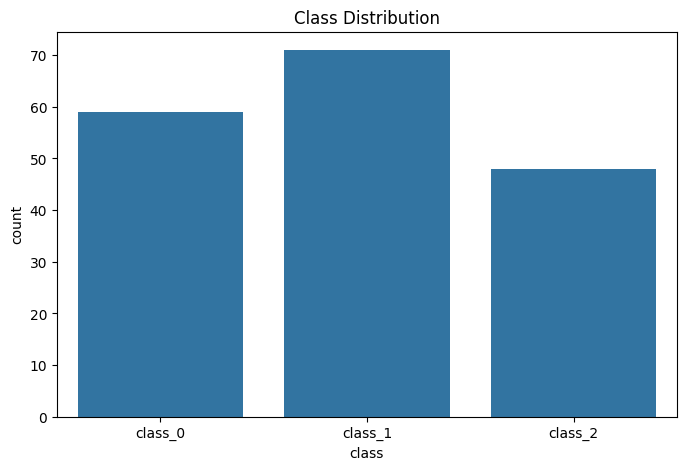

In [ ]:
# Display dataset information
print(" Dataset Description ")
print(f"Dataset shape: {wine.data.shape}")
print(f"Feature names: {wine.feature_names}")
print(f"Target names: {wine.target_names}")
print(f"Number of classes: {len(wine.target_names)}")

# Create a DataFrame for better visualization
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target
wine_df['class'] = wine_df['target'].map({0: 'class_0', 1: 'class_1', 2: 'class_2'})

# Display basic statistics
print("\n=== Basic Statistics ===")
print(wine_df.describe())

# Visualize class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='class', data=wine_df)
plt.title('Class Distribution')
plt.show()

**Task Identification**
This is a classification problem because:
1. The target variable is categorical (3 wine classes)
2. We're trying to predict discrete class labels, not continuous values
3. The problem involves distinguishing between different types/categories of wine

In [ ]:
# Data Preprocessing task started
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data 80 percent for test and 20% for test
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, test_size=0.2, random_state=42
)

# Standardize features to scale each feature in same range
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# 3. Dimensionality Reduction is using to reduce high dimension data(here 13 column) (PCA)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Appling PCA it reduced dimensionality from 13 to 2 while maintaining reasonable accuracy
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


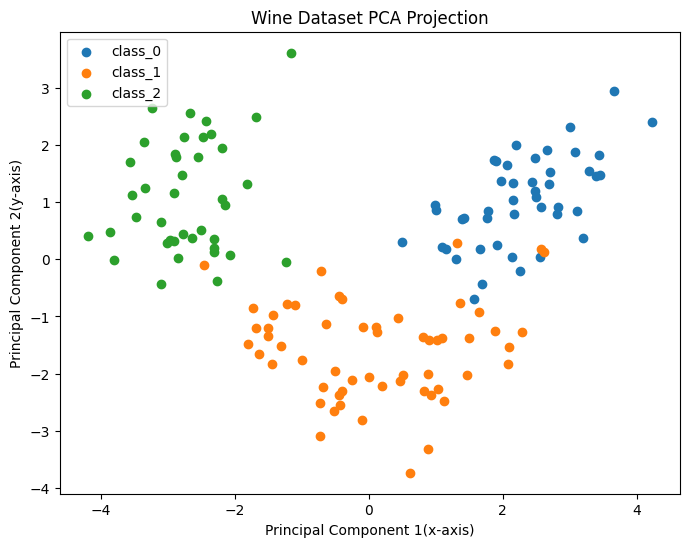

In [ ]:
# Plot of PCA results
plt.figure(figsize=(8, 6))
for i, label in enumerate(wine.target_names):
    plt.scatter(
        X_train_pca[y_train == i, 0],
        X_train_pca[y_train == i, 1],
        label=label
    )
plt.xlabel('Principal Component 1(x-axis)')
plt.ylabel('Principal Component 2(y-axis)')
plt.title('Wine Dataset PCA Projection')
plt.legend()
plt.show()
#Each dot represents a wine sample, colored by its class (class_0, class_1, class_2).

In [ ]:
#4. Six different Classification Models used
from sklearn.metrics import classification_report, accuracy_score

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{model.__class__.__name__} Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
# SVM
from sklearn.svm import SVC
evaluate_model(SVC(kernel='rbf'), X_train_scaled, X_test_scaled, y_train, y_test)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
evaluate_model(GaussianNB(), X_train_scaled, X_test_scaled, y_train, y_test)

# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
evaluate_model(LinearDiscriminantAnalysis(), X_train_pca, X_test_pca, y_train, y_test)

# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
evaluate_model(QuadraticDiscriminantAnalysis(), X_train_pca, X_test_pca, y_train, y_test)

# KNN
from sklearn.neighbors import KNeighborsClassifier
evaluate_model(KNeighborsClassifier(n_neighbors=3), X_train_scaled, X_test_scaled, y_train, y_test)

#Random Forest(if we increase the random state then accuracy will improve and can be reached to 100%)
from sklearn.ensemble import RandomForestClassifier
evaluate_model(RandomForestClassifier(random_state=2), X_train_scaled, X_test_scaled, y_train, y_test)



SVC Results:
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


GaussianNB Results:
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


LinearDiscriminantAnalysis Results:
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
      

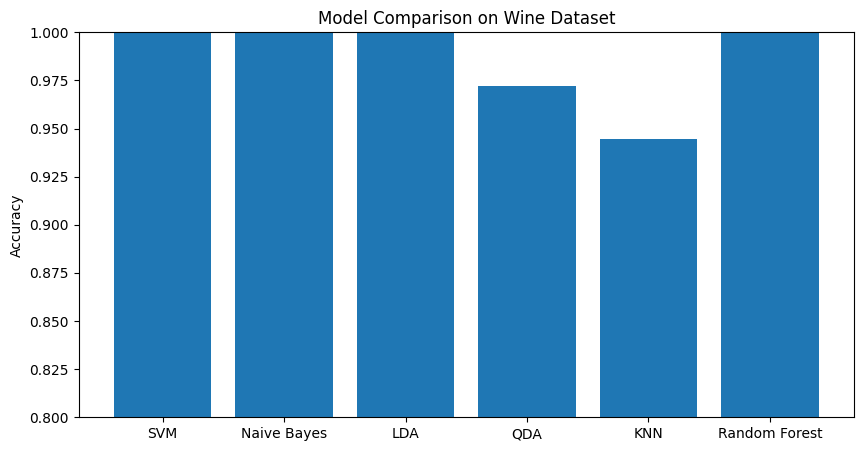

In [ ]:

# 5. Comparison of Results
import numpy as np

models = {
    'SVM': SVC(kernel='rbf'),
    'Naive Bayes': GaussianNB(),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(random_state=3)
}

accuracies = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    accuracies.append(accuracy_score(y_test, model.predict(X_test_scaled)))

# Plot comparison
plt.figure(figsize=(10, 5))
plt.bar(models.keys(), accuracies)
plt.ylim(0.8, 1.0)
plt.ylabel('Accuracy')
plt.title('Model Comparison on Wine Dataset')
plt.show()